# Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [1]:
#Import necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
dtype={'user_id': int}

In [2]:
#Load the dataset 
loan=pd.read_csv("loan/loan.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Initial Analysis of dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


info() does not show any information due to too many columns. Need to find irrelevant columns to first remove them.

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
#From above result we see there are many columns which contain all NaNs.

In [9]:
loan.shape[0]/2

19858.5

# Probaby good to remove columns containing 25% or more NaNs. 

This shows many columns have completely null fields as loan.shape shows 39717 records and above many columns have 39717 null values.

In [10]:
#Let's look at new dataset.
print(loan.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


<AxesSubplot:ylabel='Count'>

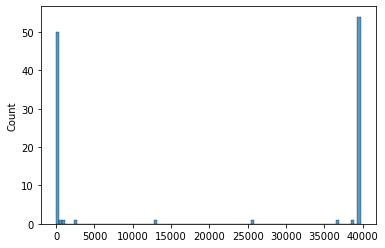

In [11]:
#Info() does not provide enough information. Lets do some more analysis
#Let's look at new dataset.
nans= loan.isnull().sum()
print(nans)
sns.histplot(x=loan.isnull().sum(), bins=100)

In [12]:
# More than 50 columns have almost all empty values.
# Good to drop columns containg 80% of NaNs (80% is considered as a guideline provided by the mentor in the session)
min_percentage_nan_allowed = 20.00
min_valid_values_allowed =  int(((100-min_percentage_nan_allowed)/100)*loan.shape[0] + 1) #Calculate (100-min_percentage_nan_allowed)% of non-NaN values below which all columns wil be dropped
print(min_valid_values_allowed)

31774


In [13]:
# Drop all columns which have 75% of NaN values
loan_new = loan.dropna(axis=1,how='any', 
                thresh=min_valid_values_allowed)

In [14]:
#Let's look at new dataset.
loan_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
#Print columns containing all NaNs
for col in loan_new.columns:
  if loan_new.loc[:, col].isnull().sum() > min_valid_values_allowed:
    print("Column Name : " + col + " NaN Count " + str(loan_new.loc[:, col].isnull().sum()))

In [16]:
# Great! - We have now columns only 75% of valid values .

In [17]:
loan_new.isnull().mean() * 100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [18]:
#All columns with less than 10% of NaNs and we are left with 52 columns. So we complete the first step.

# Remove irrelevant columns

In [19]:
#Let's do some analysis of the remaining columns.
loan_new.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

# Analysis
Following columns can be removed for the reason given.

1. Not related/Demographic data - id, member_id,Title, zipcode,emp_title,addr_state,collection_recovery_fee,installment,out_prncp,url are not not related so can be dropped.
2. chargeoff_within_12_mths, collections_12_mths_ex_med,policy_code,acc_now_delinq, application_type,chargeoff_within_12_mths, delinq_amnt, tax_liens, initial_list_status,pymnt_plan also do not look relevant with all having same content(single value from above loan_new.nunique() code) so drop them
3. Columns are not related to information processed at the time - delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d.

In [20]:
#id, member_id,Title, zipcode,emp_title,addr_state,collection_recovery_fee,installment,out_prncp,url are not not related so can be dropped.
#chargeoff_within_12_mths, collections_12_mths_ex_med,policy_code,acc_now_delinq, application_type,chargeoff_within_12_mths, delinq_amnt, tax_liens, initial_list_status,pymnt_plan also do not look relevant with all having same content so drop them
#Columns are not related to information processed at the time of application - delinq_2yrs, earliest_cr_line, inq_last_6mths, issue_d, last_credit_pull_d, open_acc, pub_rec, pub_rec_bankruptcies, total_acc so can be dropped
demographic_cols = ['id','member_id','title','zip_code','emp_title','addr_state','collection_recovery_fee','installment','out_prncp','url']
single_value_cols=['chargeoff_within_12_mths', 'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type','chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'initial_list_status','pymnt_plan']
post_loan_approval_cols = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'issue_d', 'last_credit_pull_d', 'open_acc', 'pub_rec',
                           'pub_rec_bankruptcies', 'total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','revol_bal','revol_util','out_prncp_inv']
loan_new.drop(demographic_cols, axis=1, inplace=True)
loan_new.drop(single_value_cols, axis=1, inplace=True)
loan_new.drop(post_loan_approval_cols, axis=1, inplace=True)

In [21]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  dti                  39717 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 4.2+ MB


# Cleanup step 1: Standardization of data
Map the categorical data to numerical values and fill nans.

In [22]:
loan_new.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [23]:
loan_new.term = loan_new.term.map({' 36 months': 36, ' 60 months': 60})
loan_new.term.unique()

array([36, 60], dtype=int64)

In [24]:
loan_new.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [25]:
def emp_length(x):
    if x == '10+ years':
        return 10
    elif x == '< 1 year':
        return 0
    elif x == '1 year':
        return 1
    elif x == '2 years':
        return 2
    elif x == '3 years':
        return 3
    elif x == '4 years':
        return 4
    elif x == '5 years':
        return 5
    elif x == '6 years':
        return 6
    elif x == '7 years':
        return 7
    elif x == '8 years':
        return 9
    elif x == '9 years':
        return 9

In [26]:
loan_new.emp_length = loan_new.emp_length.apply(emp_length)

In [27]:
loan_new.emp_length.unique()

array([10.,  0.,  1.,  3.,  9.,  4.,  5.,  6.,  2.,  7., nan])

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

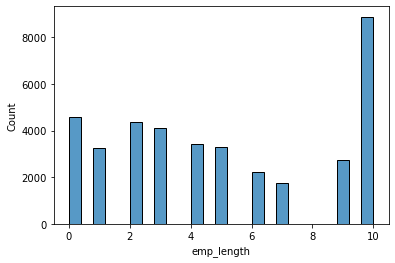

In [28]:
sns.histplot(loan_new.emp_length)

In [29]:
loan_new.emp_length.mean()

5.011722995704156

In [30]:
loan_new.emp_length.fillna(value=loan_new.emp_length.mean(), inplace=True)

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

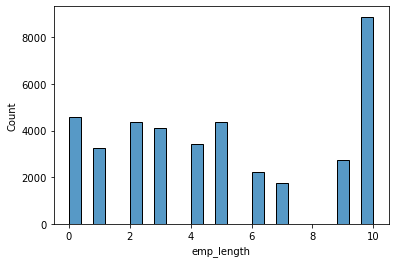

In [31]:
sns.histplot(loan_new.emp_length)

In [32]:
loan_new.term.unique()

array([36, 60], dtype=int64)

In [33]:
loan_new.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [34]:
loan_new.int_rate= loan_new.int_rate.map(lambda x: str(x).rstrip('%'))

In [35]:
loan_new.int_rate.unique()

array(['10.65', '15.27', '15.96', '13.49', '12.69', '7.90', '18.64',
       '21.28', '14.65', '9.91', '16.29', '6.03', '11.71', '12.42',
       '14.27', '16.77', '7.51', '8.90', '18.25', '6.62', '19.91',
       '17.27', '17.58', '21.67', '19.42', '22.06', '20.89', '20.30',
       '23.91', '19.03', '23.52', '23.13', '22.74', '22.35', '24.11',
       '6.00', '22.11', '7.49', '11.99', '5.99', '10.99', '9.99', '18.79',
       '11.49', '8.49', '15.99', '16.49', '6.99', '12.99', '15.23',
       '14.79', '5.42', '10.59', '17.49', '15.62', '21.36', '19.29',
       '13.99', '18.39', '16.89', '17.99', '20.62', '20.99', '22.85',
       '19.69', '20.25', '23.22', '21.74', '22.48', '23.59', '12.62',
       '18.07', '11.63', '7.91', '7.42', '11.14', '20.20', '12.12',
       '19.39', '16.11', '17.54', '22.64', '13.84', '16.59', '17.19',
       '12.87', '20.69', '9.67', '21.82', '19.79', '18.49', '22.94',
       '24.59', '24.40', '21.48', '14.82', '14.17', '7.29', '17.88',
       '20.11', '16.02', '17

In [36]:
loan_new.int_rate = loan_new.int_rate.astype("float64")

In [37]:
print(loan_new.grade.unique())
print(loan_new.sub_grade.unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


In [38]:
loan_new['grade'] = loan_new.grade.map({'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6})
print(loan_new.grade.unique())

[1 2 0 4 5 3 6]


In [39]:
loan_new['sub_grade'] = loan_new.sub_grade.map({'B2':0, 'C4':1, 'C5':2, 'C1':3,
                                             'B5':4, 'A4':5, 'E1':6, 'F2':7,
                                             'C3':8, 'B1':9,   'D1':10, 'A1':11, 'B3':12, 'B4':13,
                                             'C2':14, 'D2':15, 'A3':16, 'A5':17, 'D5':18, 'A2':19,
                                             'E4':20, 'D3':21, 'D4':22, 'F3':23, 'E3':24, 'F4':25, 'F1':26, 'E5':27,
                                             'G4':28, 'E2':29, 'G3':30, 'G2':31, 'G1':32, 'F5':33, 'G5':34})
print(loan_new.sub_grade.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]


In [40]:
loan_new.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [41]:
loan_new['purpose'] = loan_new.purpose.map({'credit_card': 0,'car': 1,'small_business': 2,'other': 3,'wedding': 4,
                                     'debt_consolidation': 5,'home_improvement': 6,
                                     'major_purchase': 7,'medical': 8,'moving': 9,
                                     'vacation': 10,'house': 11,
                                     'renewable_energy': 12,'educational': 13})

In [42]:
loan_new.purpose.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [43]:
loan_new.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [44]:
#loan_new['loan_status'] = loan_new.loan_status.map({'Fully Paid': 0,'Charged Off': 1,'Current': 2})
loan_new.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [45]:
def int_rate_slab(int_rate) :
    
    if int_rate >= 20 :
        return 0
    elif (int_rate >= 15):
        return 1
    elif (int_rate >= 10):
        return 2
    elif (int_rate >= 5):
        return 3

#loan_new["int_rate"] = loan_new.int_rate.apply(int_rate_slab)
loan_new["int_rate"].unique()

array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.59, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88,
       20.11, 16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14,
       11.11, 10.37, 16.4 ,  7.66, 10.  , 18.62, 10.74,  5.79,  6.92,
        9.63, 14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22,
       19.74, 20.48,

In [46]:
loan_new.dti.unique()

array([27.65,  1.  ,  8.72, ...,  1.79,  0.12, 25.43])

In [47]:
def dti_slab(dti) :
    
    if int_rate >= 25 :
        return 0
    elif int_rate >= 20 :
        return 1
    elif (int_rate >= 15):
        return 2
    elif (int_rate >= 10):
        return 3
    elif (int_rate >= 5):
        return 4

loan_new["dti"] = loan_new.dti.apply(int_rate_slab)
loan_new.dti.unique()

array([ 0., nan,  3.,  1.,  2.])

In [48]:
#loan_new.verification_status.unique()
#loan_new.verification_status = loan_new.verification_status.map({'Verified': 0,'Source Verified': 1,'Not Verified': 2})

In [49]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  int64  
 4   int_rate             39717 non-null  float64
 5   grade                39717 non-null  int64  
 6   sub_grade            39717 non-null  int64  
 7   emp_length           39717 non-null  float64
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  int64  
 13  dti                  34577 non-null  float64
dtypes: float64(5), int64(6), object(3)
memory usage: 4.2+ MB


In [50]:
#We have now mapped all NaNs and few categorical data to numerical.

# EDA
Considering the Objective of the case study provided in the upgrad learning module:

Applicant has following load states:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These    
candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

From the description we need to consider loan_status as target variable.

# Univariate Analysis
Cleanup step 1: Find outliers

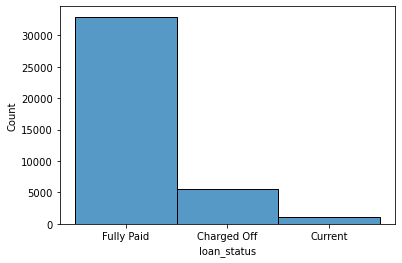

In [51]:
#Check how the target variable "loan_status" distribution looks like.
sns.histplot(x="loan_status", data=loan_new, palette="bwr")
plt.show()

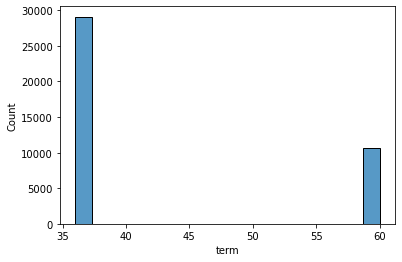

In [52]:
#Check how the "term" variable distribution looks like.
sns.histplot(x="term", data=loan_new, palette="bwr")
plt.show()

<AxesSubplot:ylabel='loan_amnt'>

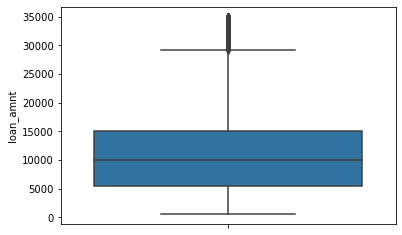

In [53]:
sns.boxplot(y=loan_new.loan_amnt)

In [54]:
#loan_amnt has outliers but overall looks good and no need to process outliers

<AxesSubplot:ylabel='int_rate'>

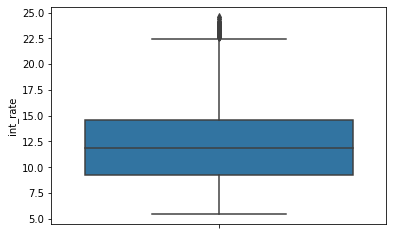

In [55]:
sns.boxplot(y=loan_new.int_rate)

In [56]:
#int_rate has outliers but overall looks good and no need to process outliers

<AxesSubplot:ylabel='term'>

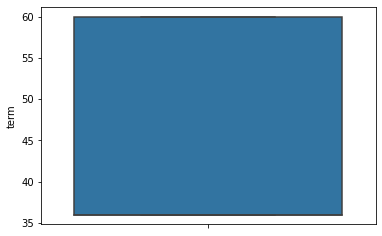

In [57]:
sns.boxplot(y=loan_new.term)

In [58]:
#Since term has only 2 values it does not make sense to analyse term hence the boxplot does not show properly.

<AxesSubplot:ylabel='emp_length'>

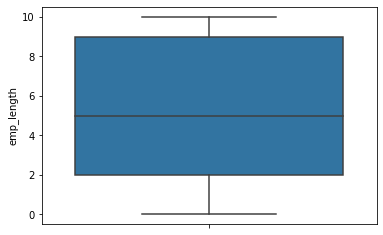

In [59]:
sns.boxplot(y=loan_new.emp_length)

In [60]:
#emp_length also looks good.

<AxesSubplot:ylabel='dti'>

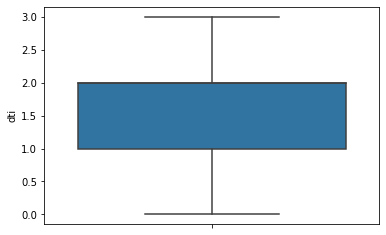

In [61]:
sns.boxplot(y=loan_new.dti)

In [62]:
#dti also looks good.

In [63]:
loan_new.dti.nunique()

4

<AxesSubplot:ylabel='annual_inc'>

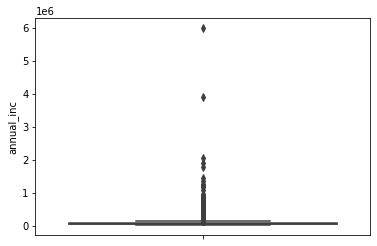

In [64]:
sns.boxplot(y=loan_new.annual_inc)

In [65]:
#annual_inc does not look good from outlier point of view. This has outliers.
#But as per instructions in lending group case study mentor session we
#are only supposed to mention outlier presence and no need to remove them.

# Bivariate Analysis
Since loan_status(target variable) is a categorical variable so lets use following plots for analysis:
1. Boxplot - used for category-continuous variable analysis
2. Barplot - used for category-continuous variable analysis
3. countplots - used for category-category or category-continuous variable analysis
4. catplot - used for category-category variable analysis

1. Analyze Interest Analysis

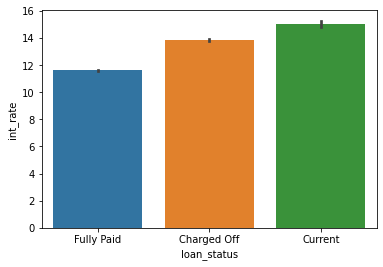

In [66]:
sns.barplot(y=loan_new.int_rate, x=loan_new.loan_status)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

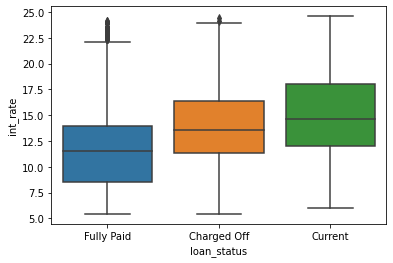

In [67]:
sns.boxplot(x=loan_new.loan_status,y=loan_new.int_rate,data=loan_new)

In [68]:
loan_new.groupby(['loan_status'])['int_rate'].describe().reset_index()

,loan_status,count,mean,std,min,25%,50%,75%,max
0,Charged Off,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
1,Current,1140.0,15.031465,3.600343,6.00,11.99,14.65,17.99,24.59
2,Fully Paid,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11


Analysis - This shows that interest rate between 14% and 17% tend to be defaulters.

2. Loan Amount Analysis

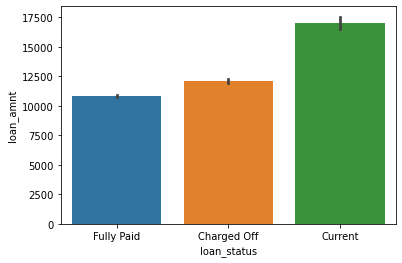

In [69]:
sns.barplot(y=loan_new.loan_amnt, x=loan_new.loan_status)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

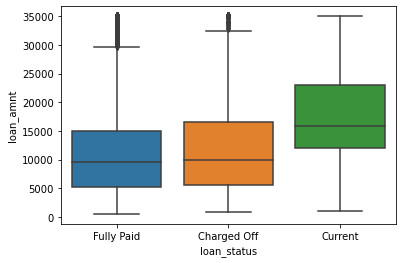

In [70]:
sns.boxplot(x=loan_new.loan_status,y=loan_new.loan_amnt,data=loan_new)

In [71]:
loan_new.groupby(['loan_status'])['loan_amnt'].describe().reset_index()

,loan_status,count,mean,std,min,25%,50%,75%,max
0,Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
1,Current,1140.0,17053.991228,8651.052316,1000.0,12000.0,15825.0,23000.0,35000.0
2,Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


Analysis - Loan amounts betwen 15000 and 16500 show the trend for defaulters

Loan Tenure Analysis

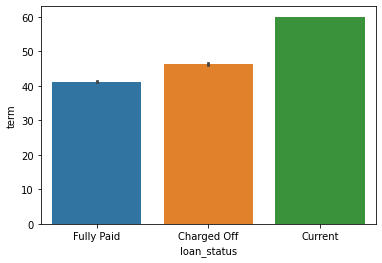

<AxesSubplot:xlabel='loan_status', ylabel='term'>

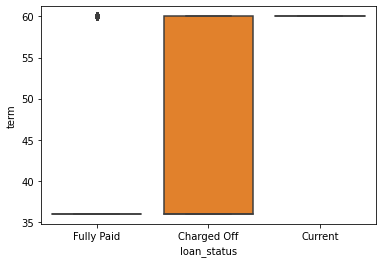

In [72]:
sns.barplot(y=loan_new.term, x=loan_new.loan_status)
plt.show()
sns.boxplot(x=loan_new.loan_status,y=loan_new.term)

barplot and boxplot did not provide much correlated information as term is just only 2 categories. Try countplot if it provides any insight.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

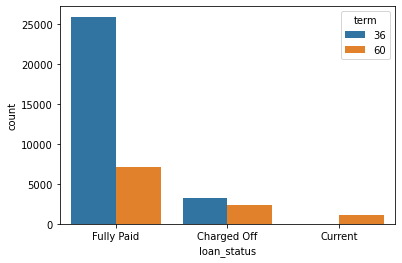

In [73]:
sns.countplot(x='loan_status',hue='term',data=loan_new)

Analysis - countplot helps in this case to show loan tenures of 36 months tend to default more. Which also can be related to purpose which we can analyze next

Loan Grade Analysis

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

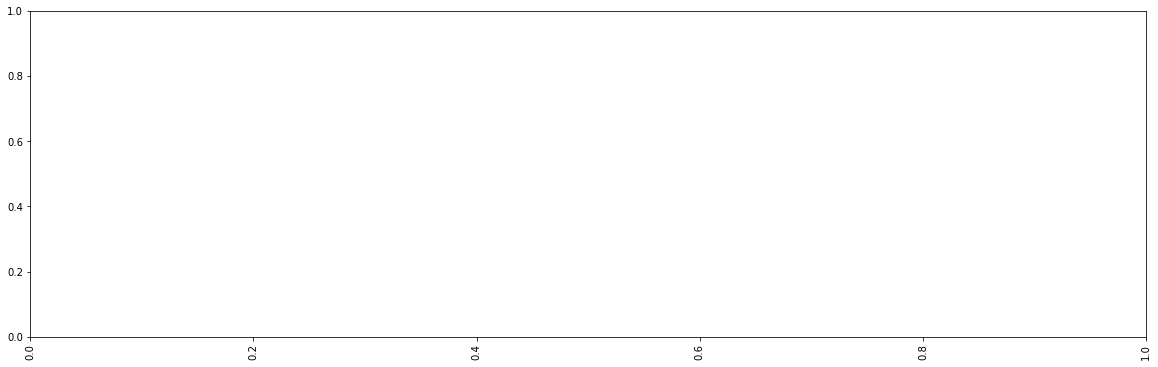

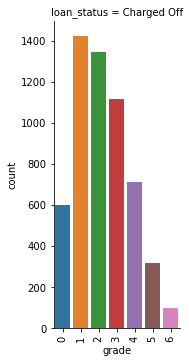

In [97]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.catplot(x="grade",
            col='loan_status',            
            kind="count", data=loan_new[loan_new.loan_status == 'Charged Off'],
            aspect=0.5)
plt.xticks(rotation=90)

Let's see if there is any relation of purpose and loan tenure.

<AxesSubplot:xlabel='purpose', ylabel='count'>

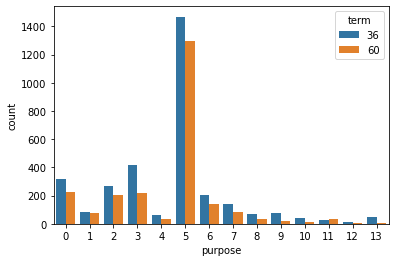

In [75]:
sns.countplot(x='purpose',hue='term',data=loan_new[loan_new.loan_status == 'Charged Off'])

Analysis - In the above chart the purpose 5 maps to debt_consolidation which can be seen that lot of people take 36 month loan for debt_consolidation.

Analyze Grade

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

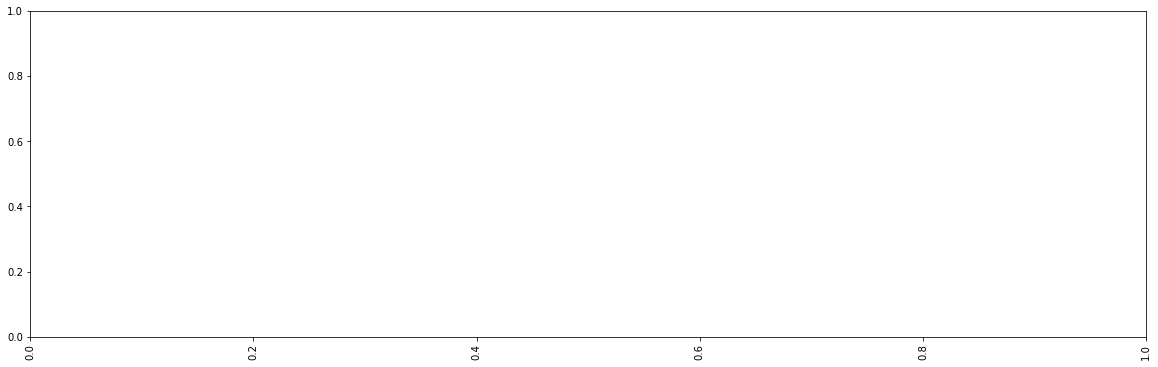

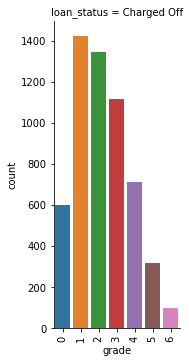

In [76]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.catplot(x="grade",
            col='loan_status',            
            kind="count", data=loan_new[loan_new.loan_status == 'Charged Off'],
            aspect=0.5)
plt.xticks(rotation=90)

Analysis - Grade B loans are probable to default

Sub Grade Analysis

<AxesSubplot:xlabel='loan_status', ylabel='sub_grade'>

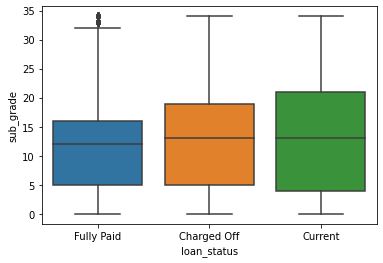

In [78]:
sns.boxplot(x=loan_new.loan_status, y=loan_new.sub_grade)

In [79]:
loan_new.groupby(['loan_status'])['sub_grade'].describe().reset_index()

,loan_status,count,mean,std,min,25%,50%,75%,max
0,Charged Off,5627.0,12.740714,8.487739,0.0,5.0,13.0,19.0,34.0
1,Current,1140.0,13.262281,8.696350,0.0,4.0,13.0,21.0,34.0
2,Fully Paid,32950.0,11.253566,7.201181,0.0,5.0,12.0,16.0,34.0


This shows result that sub_grade 16('A3'), 17('A5'), 18('D5'), 19('A2') tend to be defaulters.

Home Ownerhip Analysis

(array([0, 1, 2, 3]),
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'OWN'),
  Text(2, 0, 'MORTGAGE'),
  Text(3, 0, 'OTHER')])

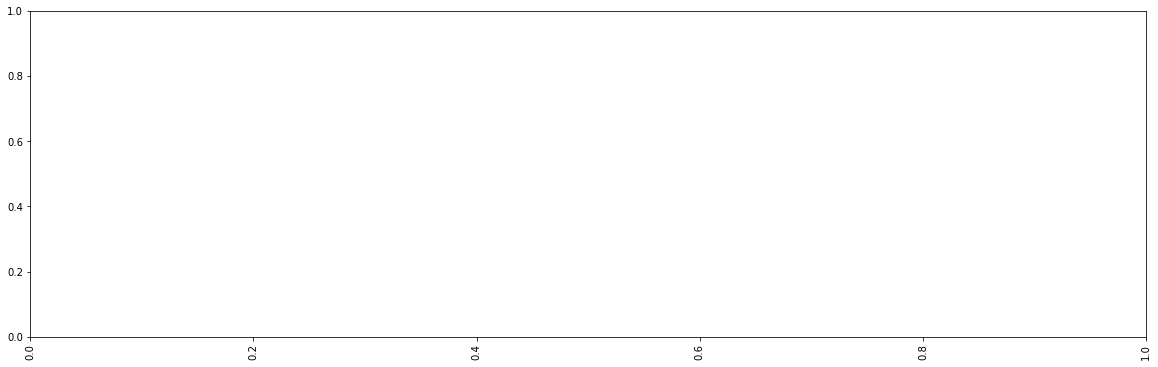

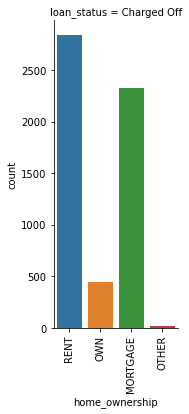

In [93]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.catplot(x="home_ownership",
            col='loan_status',            
            kind="count", data=loan_new[loan_new.loan_status == 'Charged Off'],
            aspect=0.5)
plt.xticks(rotation=90)

People on RENT are risky for defaulters

Verification Status

(array([0, 1, 2]),
 [Text(0, 0, 'Source Verified'),
  Text(1, 0, 'Verified'),
  Text(2, 0, 'Not Verified')])

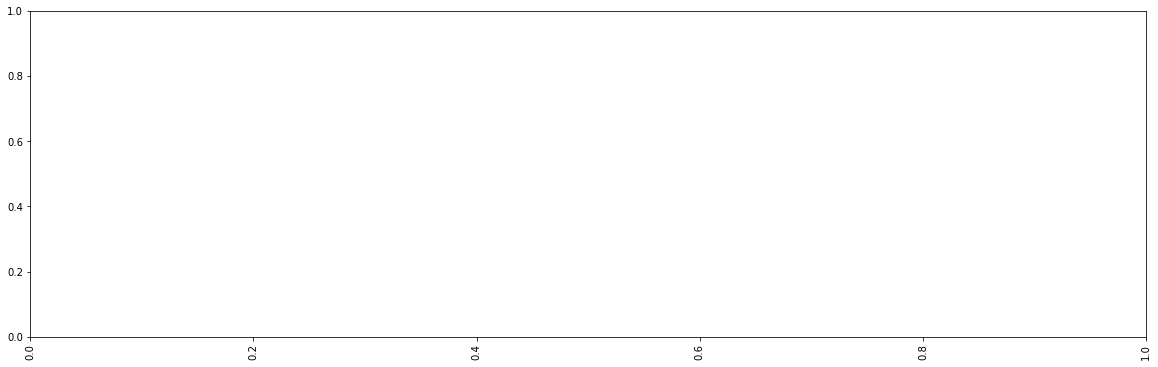

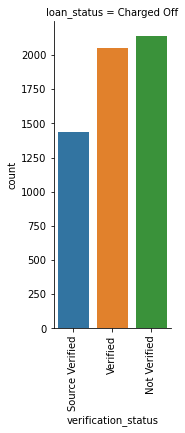

In [95]:
plt.figure(figsize=(20,6))
#sns.barplot(x=loan_new.loan_status,y=loan_new.verification_status)
plt.xticks(rotation=90)
sns.catplot(x="verification_status",
            col='loan_status',            
            kind="count", data=loan_new[loan_new.loan_status == 'Charged Off'],
            aspect=0.5)
plt.xticks(rotation=90)

Analysis - Verification status as "Not Verified" have some chance to default.

Employement Length Analysis

<AxesSubplot:xlabel='loan_status', ylabel='emp_length'>

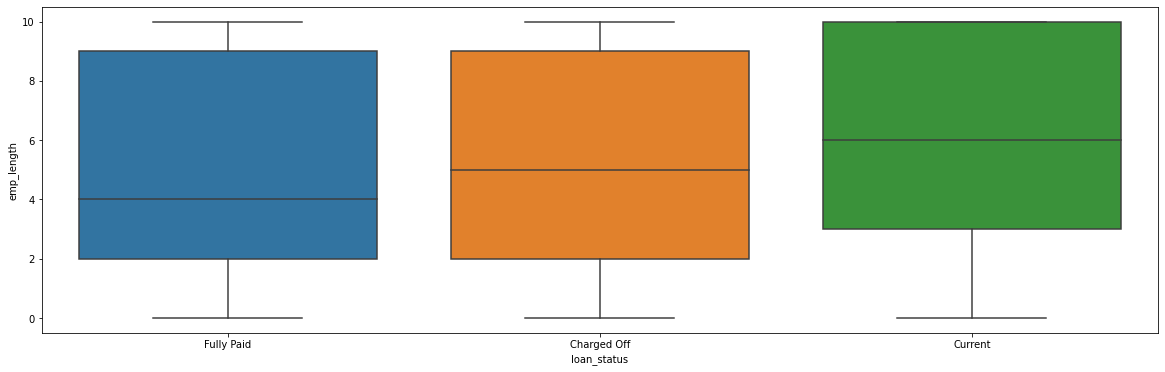

In [83]:
plt.figure(figsize=(20,6))
sns.boxplot(x=loan_new.loan_status, y=loan_new.emp_length)

In [84]:
#emp_length also does not show much variable in quantiles betwen Fully Paid and Charged Off. So cannot conclude much from dti.

<AxesSubplot:xlabel='loan_status', ylabel='count'>

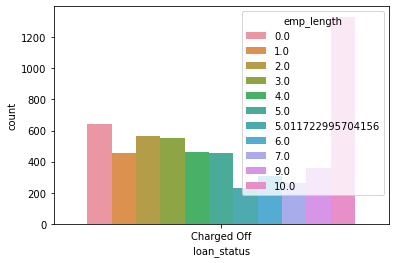

In [104]:
sns.countplot(x='loan_status',hue='emp_length',data=loan_new[loan_new.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

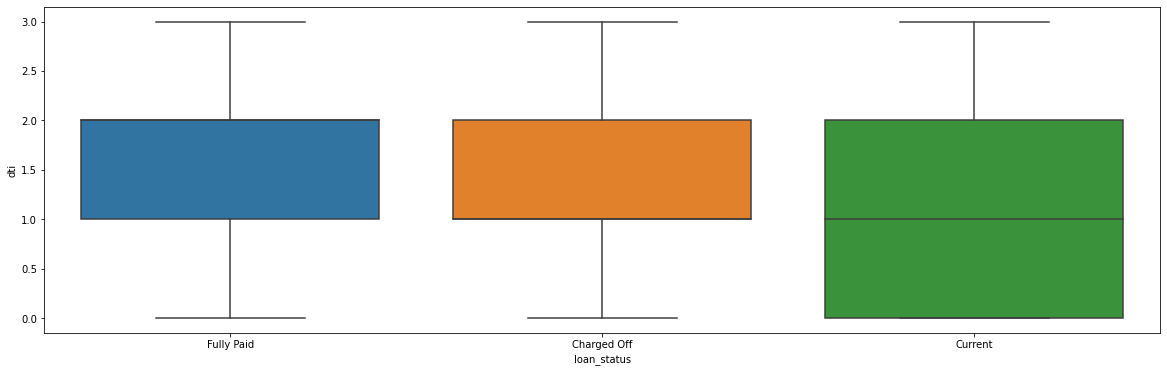

In [85]:
plt.figure(figsize=(20,6))
sns.boxplot(x=loan_new.loan_status, y=loan_new.dti)

In [86]:
#dti also does not show much variable in quantiles betwen Fully Paid and Charged Off. So cannot conclude much from dti.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

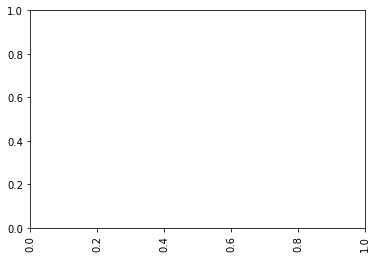

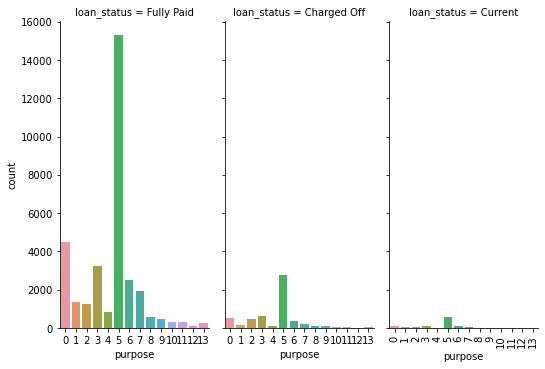

In [87]:
plt.xticks(rotation=90)
sns.catplot(x="purpose",
            col='loan_status',            
            kind="count", data=loan_new,
            aspect=0.5)
plt.xticks(rotation=90)